<a href="https://colab.research.google.com/github/Kabir26-star/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [81]:
from google.colab import files
uploaded = files.upload()

In [82]:
df = pd.read_csv("03. Slow Moving Part Data 2.csv", encoding='latin-1')
df

,Year,Site Name (Id),Technical CLUSTER,ABC Indicator,Material - Text,Material Type,Material Status,Material - Key,Supplier 1,Supplier 1 names,...,Slow Move Rate,Slow Move B+C,Slow Move Part,Reorder Point,Out of Stock,Withdraw Quantity,Stock Quantity,BOM Quantity,Stock 0,Unnamed: 29
0,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Bearing Cannister Assy CA109068/PA415750,ERSA,Z3-Active,104646407.0,100096062.0,GEA Nu-Con Pty Limited,...,-,-,-,20,-,11,52,3,4,NaN
1,2025.0,MY PL NMM-Sri Muda (9536),Malaysia & Singapore,A,C Valve Cone Seat Tetra 6-4722 1274 08,ERSA,Z3-Active,103479765.0,100005559.0,Tetra Pak (Malaysia) Sdn Bhd,...,NaN,NaN,-,20,-,43,62,1,3,NaN
2,2025.0,MY PL NMM-Chembong (9453),Malaysia & Singapore,A,Sieve Sweco Support Screen 72 72005M017,ERSA,Z3-Active,100780627.0,100006515.0,Arachem (M) Sdn Bhd,...,NaN,NaN,1,12,-,8,15,3,5,NaN
3,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,#,Screen Sifter PH15-0190-51199-6958,ERSA,Z4-Under Discontinuation,103467603.0,100008829.0,VIBRA MASCHINENFABRIK Schultheis,...,NaN,NaN,-,-,-,287,27,41,-,NaN
4,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,Z,Assembly Computer SMITHS 71150057,ERSA,Z3-Active,102268896.0,100876199.0,Mettler Toledo Eagle,...,NaN,NaN,25,-,-,7,6,23,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,B,Tube Silverpress Nipples 850mmE54 TopLid,ERSA,Z3-Active,105654302.0,100007656.0,Compair GmbH,...,-,-,-,4,-,1,2,-,1,NaN
149997,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Cylinder DSBC-32-100-PPVA-N3 Festo,ERSA,Z3-Active,106011787.0,100131928.0,Festo (Pty) Ltd,...,-,-,-,4,-,-,4,1,1,NaN
149998,2025.0,IN PL Ponda (0454),South Asia,B,Belt 3500 x 140 x 1.3mm Blue CHIORINO,ERSA,Z3-Active,105756773.0,101011389.0,Franstek Belts Private Limited,...,-,-,-,4,-,1,3,-,1,NaN
149999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocessing and Cleaning Data**

In [85]:
df.fillna(1, inplace = True)
df

,Year,Site Name (Id),Technical CLUSTER,ABC Indicator,Material - Text,Material Type,Material Status,Material - Key,Supplier 1,Supplier 1 names,...,Slow Move Rate,Slow Move B+C,Slow Move Part,Reorder Point,Out of Stock,Withdraw Quantity,Stock Quantity,BOM Quantity,Stock 0,Unnamed: 29
0,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Bearing Cannister Assy CA109068/PA415750,ERSA,Z3-Active,104646407.0,100096062.0,GEA Nu-Con Pty Limited,...,-,-,-,20,-,11,52,3,4,1.0
1,2025.0,MY PL NMM-Sri Muda (9536),Malaysia & Singapore,A,C Valve Cone Seat Tetra 6-4722 1274 08,ERSA,Z3-Active,103479765.0,100005559.0,Tetra Pak (Malaysia) Sdn Bhd,...,1,1,-,20,-,43,62,1,3,1.0
2,2025.0,MY PL NMM-Chembong (9453),Malaysia & Singapore,A,Sieve Sweco Support Screen 72 72005M017,ERSA,Z3-Active,100780627.0,100006515.0,Arachem (M) Sdn Bhd,...,1,1,1,12,-,8,15,3,5,1.0
3,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,#,Screen Sifter PH15-0190-51199-6958,ERSA,Z4-Under Discontinuation,103467603.0,100008829.0,VIBRA MASCHINENFABRIK Schultheis,...,1,1,-,-,-,287,27,41,-,1.0
4,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,Z,Assembly Computer SMITHS 71150057,ERSA,Z3-Active,102268896.0,100876199.0,Mettler Toledo Eagle,...,1,1,25,-,-,7,6,23,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,B,Tube Silverpress Nipples 850mmE54 TopLid,ERSA,Z3-Active,105654302.0,100007656.0,Compair GmbH,...,-,-,-,4,-,1,2,-,1,1.0
149997,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Cylinder DSBC-32-100-PPVA-N3 Festo,ERSA,Z3-Active,106011787.0,100131928.0,Festo (Pty) Ltd,...,-,-,-,4,-,-,4,1,1,1.0
149998,2025.0,IN PL Ponda (0454),South Asia,B,Belt 3500 x 140 x 1.3mm Blue CHIORINO,ERSA,Z3-Active,105756773.0,101011389.0,Franstek Belts Private Limited,...,-,-,-,4,-,1,3,-,1,1.0
149999,1.0,1,1,1,1,1,1,1.0,1.0,1,...,1,1,1,1,1,1,1,1,1,1.0


**Inventory & Stock Analysis**

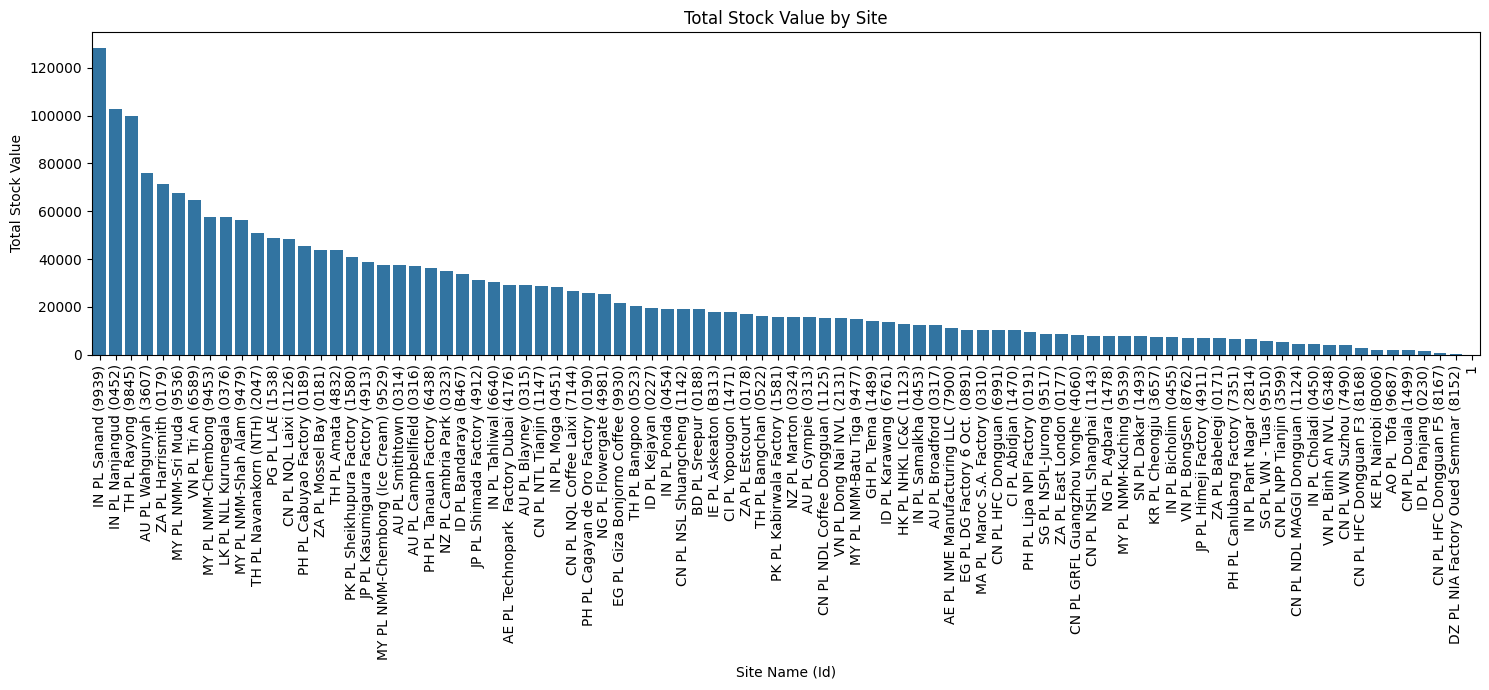

In [119]:
# Group by ' Site Name (Id) ' and calculate the sum of ' Stock Value '
site_stock_value = df.groupby('Site Name (Id)')[' Stock Value '].sum().reset_index()

# Sort the values for better visualization
site_stock_value = site_stock_value.sort_values(by=' Stock Value ', ascending=False)


# Create the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(data=site_stock_value, x='Site Name (Id)', y=' Stock Value ')
plt.title("Total Stock Value by Site")
plt.xlabel("Site Name (Id)")
plt.ylabel("Total Stock Value")
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

**Movement and Utilization**

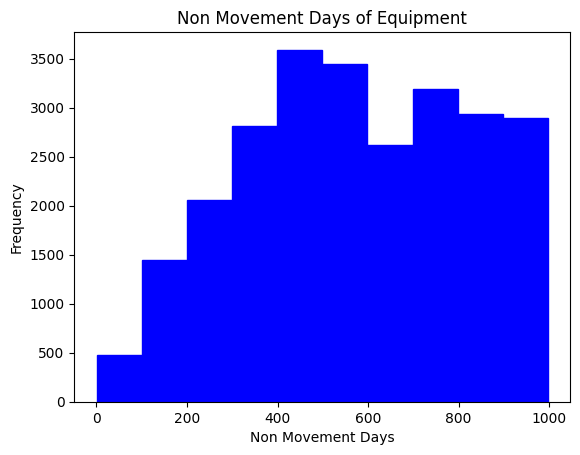

In [88]:
df[' Non Move Days '].plot(kind = 'hist', fill = True, histtype = 'step', color = 'blue')
plt.title("Non Movement Days of Equipment")
plt.xlabel("Non Movement Days")
plt.ylabel("Frequency")
plt.show()

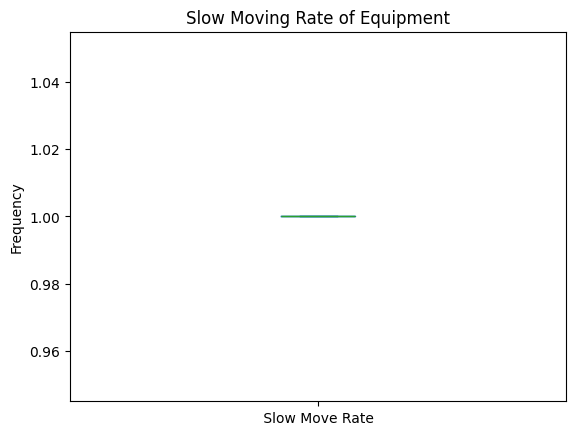

In [93]:
df[' Slow Move Rate '].plot.box()
plt.title("Slow Moving Rate of Equipment")
plt.ylabel("Frequency")
plt.show()

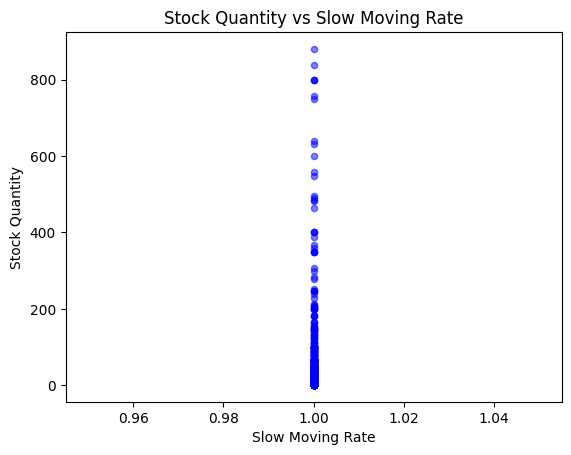

In [96]:
df.plot(x = ' Slow Move Rate ', y = ' Stock Quantity ', kind = 'scatter', color = 'blue', alpha = 0.5)
plt.title("Stock Quantity vs Slow Moving Rate")
plt.xlabel("Slow Moving Rate")
plt.ylabel("Stock Quantity")
plt.show()